In [1]:
import pandas as pd
import numpy as np
import warnings
import os

In [2]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [4]:
data = pd.read_csv('Cleaned_NB_Profile_Crime_data.csv')

In [7]:
data_ML = data
data_ML = data_ML.drop(columns=['Neighbourhood.Name'])
corr_matrix = data_ML.corr()

mask_con_corr = corr_matrix [(corr_matrix  >= 0.25) | (corr_matrix <= -0.25)]
# Summary statistics
data_ML.describe()

,Gini_i_HH_tIncome,Avg_HH_size,Avg_tIncome_HH_in_2020,Race_Total,Prop_Black,Prop_Arab,Prop_Latin_Amrican,Prop_East_SouthEast_Asian,Prop_West_Asian,Prop_multi_vis_minority,...,Prop_PS_non_Bach,Prop_PS_Bach,Prop_Graduate,MEAN_VIOLENT_CRIME_RATE_2014_2022,TOTAL_CRIME_RATE_2022,TOTAL_CRIME_RATE_2016,ROBBERY_2016,BREAKENTER_2016,SHOOTING_2016,MEAN_SHOOTING_RATE_2014_2022
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.375316,2.458861,125263.924051,17476.550633,0.093333,0.014014,0.034310,0.196253,0.023455,0.022891,...,0.211823,0.257247,0.153768,676.093769,1376.486193,1329.622746,23.139241,40.512658,2.575949,12.942913
std,0.089362,0.419300,59930.842541,6131.673250,0.075838,0.012118,0.025989,0.116336,0.028004,0.006569,...,0.042951,0.080217,0.075244,507.876007,811.299605,923.283525,20.509581,25.120027,3.702804,12.615026
min,0.200000,1.500000,72200.000000,6260.000000,0.006776,0.002294,0.003735,0.066064,0.001597,0.007571,...,0.102041,0.089848,0.026731,150.413670,508.880910,403.878540,0.000000,7.000000,0.000000,0.000000
25%,0.300000,2.200000,93150.000000,12452.500000,0.041337,0.006695,0.015544,0.117772,0.007332,0.017423,...,0.177685,0.203326,0.093918,389.198492,872.198724,801.390477,10.000000,24.000000,0.000000,4.152433
50%,0.400000,2.500000,105800.000000,16812.500000,0.067819,0.010460,0.026378,0.159881,0.013700,0.022941,...,0.220438,0.256928,0.143393,595.302736,1195.321148,1124.989210,17.000000,34.000000,1.000000,8.739403
75%,0.400000,2.700000,131150.000000,22216.250000,0.120328,0.016745,0.042595,0.229275,0.025515,0.026734,...,0.246344,0.320347,0.213656,799.364350,1568.010507,1546.082075,29.000000,51.750000,3.000000,18.242289
max,0.700000,3.800000,519500.000000,33300.000000,0.379015,0.069392,0.129165,0.703294,0.161616,0.043131,...,0.289720,0.489571,0.339469,3994.692128,5893.769620,7391.077900,124.000000,150.000000,22.000000,65.425860


<Axes: >

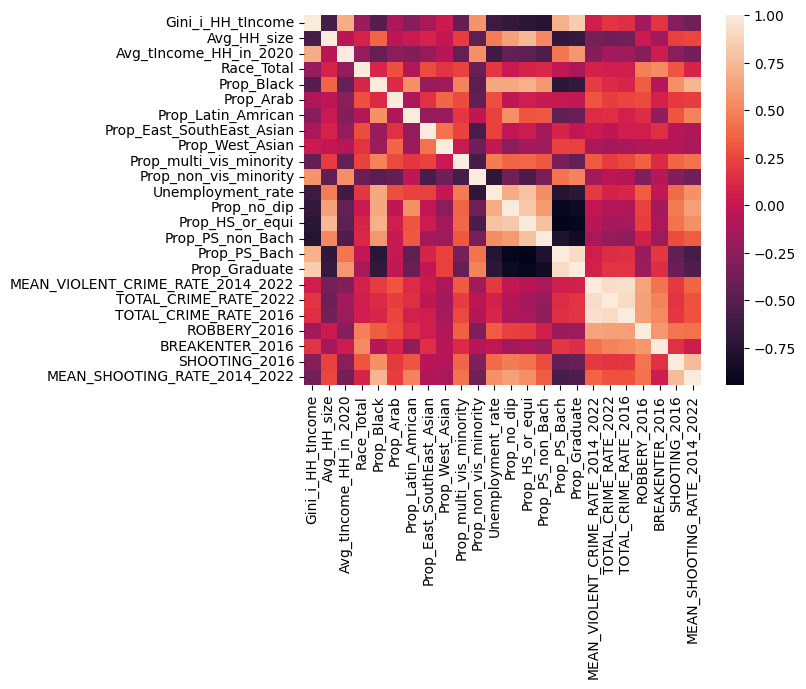

In [8]:
#sns.heatmap(mask_con_corr, corr_matrix, annot=True, fmt=".2f")
sns.heatmap(corr_matrix, annot=False, fmt=".2f")

In [11]:
### Build the multivariate regression model ###
# Set the feature and labels
y = data['TOTAL_CRIME_RATE_2016']
X_multi = data[['Gini_i_HH_tIncome', 'Avg_HH_size',
       'Avg_tIncome_HH_in_2020', 'Race_Total', 'Prop_Black', 'Prop_Arab',
       'Prop_Latin_Amrican', 'Prop_East_SouthEast_Asian', 'Prop_West_Asian',
       'Prop_multi_vis_minority', 'Prop_non_vis_minority', 'Unemployment_rate',
       'Prop_no_dip', 'Prop_HS_or_equi', 'Prop_PS_non_Bach', 'Prop_PS_Bach',
       'Prop_Graduate']]

In [12]:
# Splitting the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Create and fit the model
mlr_model = LinearRegression()
mlr_model.fit(X_train_multi, y_train_multi)

#this is cross-validation, should I use bootstrapping instead? (probably)

# Predictions
y_pred_multi = mlr_model.predict(X_test_multi)


# Evaluating the model
print(f'Mean Squared Error (MLR): {mean_squared_error(y_test_multi, y_pred_multi)}')
print(f'R2 Score (MLR): {r2_score(y_test_multi, y_pred_multi)}')


Mean Squared Error (MLR): 339281.1592377367
R2 Score (MLR): 0.33101911670321793


In [13]:
# Obtain coefficients 
coefficients = mlr_model.coef_
intercept = mlr_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-3.44045409e+02 -7.37266701e+02 -4.15592867e-03 -5.32422372e-03
  7.22602909e+02  1.21712751e+04  4.73534925e+03 -7.02430762e+02
 -1.44214709e+04  2.94603284e+04 -1.28898296e+03 -3.95172434e+01
  2.03158487e+11  2.03158497e+11  2.03158478e+11  2.03158489e+11
  2.03158494e+11]
Intercept: -203158484677.1112


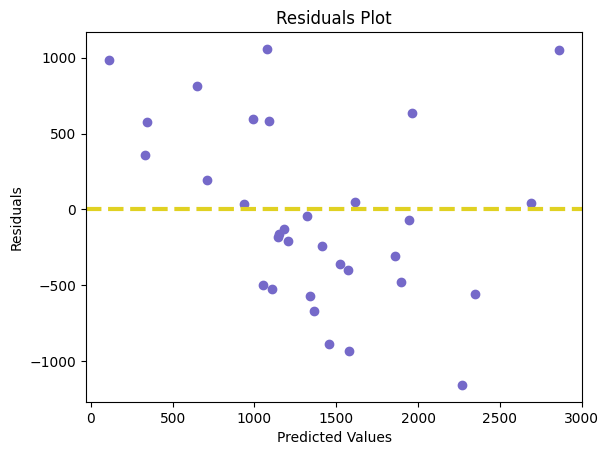

In [14]:
# Residual plotting
residuals = y_test_multi - y_pred_multi
plt.scatter(y_pred_multi, residuals, color='#7569c9')
plt.axhline(y=0, linestyle='--', color='#e0d122', lw=3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

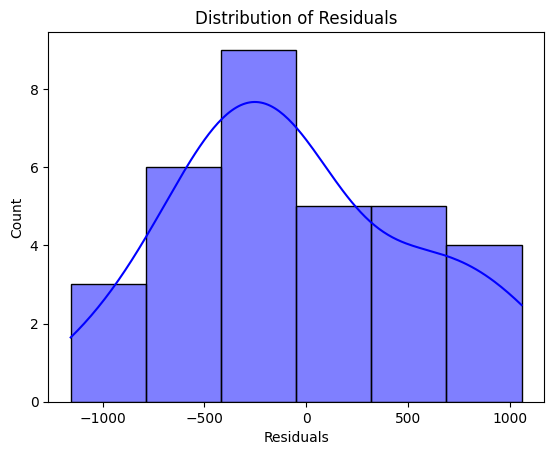

In [15]:
sns.histplot(residuals, kde=True, color='blue')

# Set the x-axis label
plt.xlabel('Residuals')

# Set the plot title
plt.title('Distribution of Residuals')

# Display the plot
plt.show()

In [16]:
####### END OF ANALYSIS #######

In [17]:
### Now we will add the predicted crime data and actual crime data from 2016 to a GEOjson file 
# this file contains the border and outline of each of the 158 neighbourhoods in Toronto 
# we will then upload this file to ArcGIS to display the distribution of the model-predicted vs actual crime data 

SyntaxError: invalid syntax (1268729485.py, line 3)

In [18]:
data['Predicted_Total_Crime_2016'] = list(mlr_model.predict(X_multi))
data['Residual_Crime_Difference'] = data['TOTAL_CRIME_RATE_2016'].sub(data['Predicted_Total_Crime_2016'])

In [19]:
import json

with open('neighbourhood-crime-rates.geojson', 'r') as f:
    data_geo = json.load(f)

#A Python dictionary containing properties to be added to each GeoJSON Feature
#properties_dict={
#    "property1": "foo",
#    "property2": 10,
#    "property3": 100
#    }
#Convert the dictionary to a list
#properties_list=zip(properties_dict.keys(),properties_dict.values())

#Loop over GeoJSON features and add the new properties
#for feat in data_geo['features']:
#    for i in range(len(mlr_model.predict(X_multi))):
#        feat ['properties']['predicted_crime_2016']= mlr_model.predict(X_multi)[i]

feature_number=0
for feat in data_geo['features']:
    feat ['properties']['predicted_crime_2016']= mlr_model.predict(X_multi)[feature_number]
    feat ['properties']['actual_crime_2016']= data['TOTAL_CRIME_RATE_2016'][feature_number]
    feat ['properties']['difference_in_crime_2016']= data['Residual_Crime_Difference'][feature_number]
    feature_number+=1
        
#Write result to a new file
with open('NBCR_New.geojson', 'w') as f:
    json.dump(data_geo, f)